In [1]:
#https://github.com/thisisashukla/computer-vision/blob/master/3_segmentation/01_non_contextual_techniques.ipynb


In [2]:
# importing libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# reading image using opencv

#name = 'IR'
#image = cv2.imread('..//assets//images//{}.jpg'.format(name))
#print('Image matrix shape {}'.format(image.shape))

image = cv2.imread('E:\P-Project & Lab\OpenCV\IR.jpg')
print('Image matrix shape {}'.format(image.shape))

Image matrix shape (162, 267, 3)


In [4]:
# image plotting helper functions

def rowPlot(images, subtitles, title):
    
    f, ax = plt.subplots(1, len(images), figsize = (5*len(images), 5))
    for i, (x, im) in enumerate(zip(ax, images)):
        if(len(im.shape) == 3):
            x.imshow(im)
        else:
            x.imshow(im, cmap = 'gray')
        x.set_title(subtitles[i])
        x.axis('off')

    f.suptitle(title)
    plt.show()

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print('Image matrix shape {}'.format(image_g.shape))

Image matrix shape (162, 267)


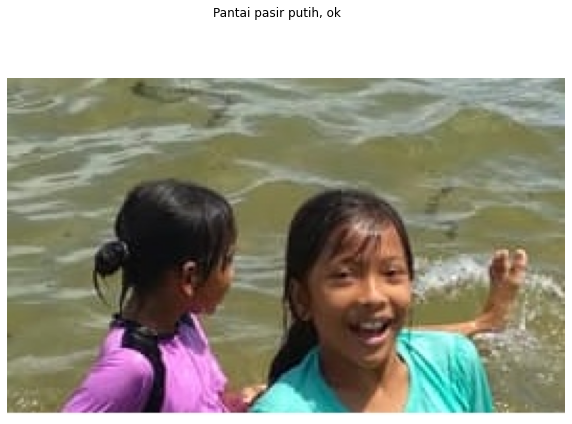

In [6]:
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax.imshow(image)
ax.axis('off')
plt.suptitle('Pantai pasir putih, ok')
plt.show()

In [7]:
# function to perform simple thresholding

def simple_thresholding1(img, thr):
    
    img_t = np.where(img >= thr, 255, 0)
    
    return img_t

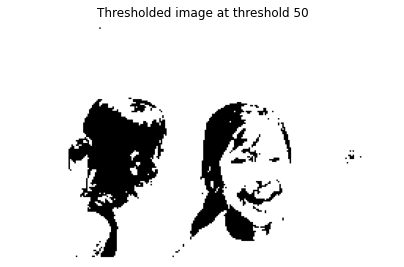

NameError: name 'name' is not defined

In [8]:
thr = 50
image_th1 = simple_thresholding1(image_g, thr)

f, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.axis('off')
plt.imshow(image_th1, cmap = 'gray')
plt.title('Thresholded image at threshold {}'.format(thr))
plt.show()

cv2.imwrite('E:\P-Project & Lab\OpenCV\{}_seg_{}.jpg'.format(name, thr), image_th1)

In [ ]:
# function to print histogram of an image

def image_hist(img):
    
    if len(img.shape) == 3:
        f, ax = plt.subplots(1, 3, figsize = (20, 5))
        ax[0].plot(cv2.calcHist([img[:, :, 0]],[0],None,[256],[0,256]), color = 'red')
        ax[1].plot(cv2.calcHist([img[:, :, 0]],[0],None,[256],[0,256]), color = 'green')
        ax[2].plot(cv2.calcHist([img[:, :, 0]],[0],None,[256],[0,256]), color = 'blue')
        plt.show()
    else:
        f, ax = plt.subplots(1, 1, figsize = (20, 5))
        ax.plot(cv2.calcHist([img[:, :]],[0],None,[256],[0,256]), color = 'black')
    plt.title('Image Histogram')
    plt.ylabel('Counts')
    plt.xlabel('Intensity Level')
    plt.show()

# function to perform simple thresholding operation with two threshold values

def simple_thresholding2(img, thr1, thr2):
    
    img_t = np.where(img >= thr2, 255, np.where(img >= thr1, 125, 0))
    
    return img_t

In [ ]:
image_hist(image_g)

In [ ]:
t1, t2 = 100, 200
image_th1 = simple_thresholding2(image_g, t1, t2)
f, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.axis('off')
plt.imshow(image_th1, cmap = 'gray')
plt.title('Thresholded image at threshold {}, {}'.format(t1, t2))
plt.show()

In [ ]:
from ipywidgets import interact, widgets

In [ ]:
def plot_thr(threshold):
    image_th1 = simple_thresholding1(image_g, threshold)
    ax[1].imshow(image_th1, cmap="gray")
    f.canvas.draw()
    display(f)

f, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].imshow(image_g, cmap="gray")
ax[1].imshow(image_g, cmap="gray")

ax[0].axis('off')
ax[1].axis('off')

interact(plot_thr, threshold=widgets.IntSlider(min=0,max=250,step=2,value=1));

In [ ]:
#Interactive(children=(IntSlider(value=1, description='threshold', max=250, step=2), Output()), _dom_classes=('…
#Simple Thresholding Techniques in OpenCV

In [ ]:
ret,thresh1 = cv2.threshold(image_g, 160, 235, cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(image_g, 160, 235, cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(image_g, 160, 235, cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(image_g, 160, 235, cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(image_g, 160, 235, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]

f, ax = plt.subplots(2, 3, figsize = (15, 10))
for i in range(2):
    for j in range(3):
        ax[i][j].imshow(images[3*i+j],'gray')
        ax[i][j].set_title(titles[3*i+j])
        ax[i][j].axis('off')

plt.show()

In [ ]:
#Adaptive Thresholding Techniques in OpenCV

In [ ]:
def plot_thr(size):
    th2 = cv2.adaptiveThreshold(image_g,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,size,2)
    th3 = cv2.adaptiveThreshold(image_g,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,size,2)
    
    ax[1].imshow(th2, cmap="gray")
    ax[2].imshow(th3, cmap="gray")
    f.canvas.draw()
    display(f)

f, ax = plt.subplots(1, 3, figsize = (15, 5))

ax[0].imshow(image_g, cmap="gray")
ax[1].imshow(image_g, cmap="gray")
ax[2].imshow(image_g, cmap="gray")

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

interact(plot_thr, size=widgets.IntSlider(min=11,max=min(image_g.shape[0], image_g.shape[1]) - 1,step=2,value=1));
#interactive(children=(IntSlider(value=11, description='size', max=1364, min=11, step=2), Output()), _dom_class…

In [ ]:
#A More Analytical Method To Segment Image using Thresholding
We have seen that different values of threshold yield different results. Thus we need to find out that value of threshold which will yield the best result.

This brings up a point about how should we evaluate which segmented image is better. We refer back to Pavlidis's definition to derive the criterion for evaluating a better segmentation. A criterion to evaluate the quality of segmented images is the sum of class variances.

intra class variance = square of sum of (pixel intensity - mean pixel intensity of the class) / number of pixels in the class

sum of intra class variances = sum of (intra class variance) for each class

Let's write some code to see if we can visualize what we have conceptualized.

How Does Intra-Class Variance Vary for Different Thresholds

In [ ]:
img_hist = cv2.calcHist([image_g], [0], None, [256], [0,256])

In [ ]:
def class_variance(hist, lower, upper):
    
    class_data = hist[lower:upper]
    weight = sum(class_data)/sum(hist)
    intensities = np.arange(lower, upper)
    weighted_sum = class_data.T*intensities.T
    if sum(class_data) == 0:
        mu = 0
        sigma2 = 0
    else:
        mu = sum(weighted_sum[0])/sum(class_data)[0]
        deviations2 = (class_data - mu).T*(class_data - mu).T
        sigma2 = sum((deviations2*intensities.T)[0])/sum(class_data)[0]
    
    
    return mu, sigma2

sigmas = []
n = sum(img_hist)
for i in range(1, 255):
    _, s1 = class_variance(img_hist, 0, i)
    _, s2 = class_variance(img_hist, i, 256)
    sigma = sum(img_hist[0:i])*s1/n + sum(img_hist[i:256])*s2/n
    sigmas.append(sigma[0])

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (15, 5))
ax.plot(sigmas)
ax.axvline(x=np.argmin(sigmas), color='r', linestyle='--')
plt.title('Plot of Sum of Intra-Class Variance')
plt.xlabel('Grayscale Intensity Level')
plt.ylabel('Variance')
plt.show()

In [ ]:
image_th = simple_thresholding1(image_g, np.argmin(sigmas))
image_th = 255 - image_th
f, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.axis('off')
plt.imshow(image_th, cmap = 'gray')
plt.title('Thresholded image using Optimum threshold'.format(np.argmin(sigmas)))
plt.show()

In [ ]:
cv2.imwrite('..//assets//traditional_segmentation//{}_otsu_threshold.jpg'.format(name), image_th)

In [ ]:
#What we have just discussed is called "Otsu's Method for Thresholding"